# Package loading and basic configurations

In [1]:
%load_ext autoreload
%autoreload 2

# load dependencies'
import pandas as pd
import geopandas as gpd

from envirocar import TrackAPI, DownloadClient, BboxSelector, ECConfig

# create an initial but optional config and an api client
config = ECConfig()
track_api = TrackAPI(api_client=DownloadClient(config=config))

# Querying enviroCar Tracks

The following cell queries tracks from the enviroCar API. It defines a bbox for the area of Münster (Germany) and requests 50 tracks. The result is a GeoDataFrame, which is a geo-extended Pandas dataframe from the GeoPandas library. It contains all information of the track in a flat dataframe format including a specific geometry column. 
## Select data from dataframe
* https://geopandas.org/indexing.html
* https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html

In [2]:
# set boundary
bbox = BboxSelector([    
    7.5777467, # min_x
    51.9514909, # min_y
    7.6544357, # max_x
    51.9693827  # max_y
])
# issue a query
track_df = track_api.get_tracks(bbox=bbox,num_results=50) # requesting 50 tracks inside the bbox
# retrieve data in a temporal period
track_df20 = track_df.loc[lambda track_df:track_df['time']>'2020-01-01-T00:00:00,:']
track_df20

,id,time,geometry,GPS Altitude.value,GPS Altitude.unit,GPS Bearing.value,GPS Bearing.unit,Throttle Position.value,Throttle Position.unit,Speed.value,...,sensor.constructionYear,sensor.manufacturer,track.appVersion,track.touVersion,O2 Lambda Voltage ER.value,O2 Lambda Voltage ER.unit,MAF.value,MAF.unit,O2 Lambda Voltage.value,O2 Lambda Voltage.unit
0,5e8baea465b80c5d6b4dbfbf,2020-04-06T20:43:35,POINT (7.65079 51.95400),100.237808,m,337.001680,deg,16.283688,%,6.000000,...,2007,Dodge,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,5e8baea465b80c5d6b4dbfc1,2020-04-06T20:43:40,POINT (7.65079 51.95412),102.772222,m,11.636667,deg,17.920277,%,14.260606,...,2007,Dodge,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,5e8baea465b80c5d6b4dbfc2,2020-04-06T20:43:45,POINT (7.65083 51.95435),104.020541,m,6.089730,deg,16.000000,%,23.999999,...,2007,Dodge,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,5e8baea465b80c5d6b4dbfc3,2020-04-06T20:43:50,POINT (7.65086 51.95463),103.999999,m,4.503939,deg,16.000000,%,21.000001,...,2007,Dodge,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5e8baea465b80c5d6b4dbfc4,2020-04-06T20:43:55,POINT (7.65090 51.95480),104.000001,m,7.967200,deg,16.000000,%,3.000000,...,2007,Dodge,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
185,5e10ec089115b85a12319742,2020-01-04T15:40:26,POINT (7.61381 52.00054),96.000000,m,325.882644,deg,15.000000,%,6.000000,...,2007,Dodge,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
186,5e10ec089115b85a12319743,2020-01-04T15:40:31,POINT (7.61374 52.00060),96.000000,m,330.004187,deg,15.000000,%,5.000000,...,2007,Dodge,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
187,5e10ec089115b85a12319744,2020-01-04T15:40:36,POINT (7.61366 52.00063),96.000000,m,0.000000,deg,15.000000,%,2.000000,...,2007,Dodge,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
188,5e10ec089115b85a12319745,2020-01-04T15:40:40,POINT (7.61366 52.00063),95.999998,m,0.000000,deg,14.000000,%,0.000000,...,2007,Dodge,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


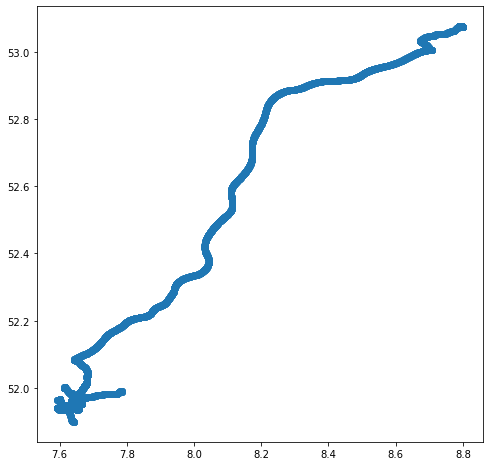

In [3]:
track_df20.plot(figsize=(8, 10))

# Generating single tracks

In [4]:
# filter out unique track id
track_id = track_df20['track.id'].unique()
tracks = []
# store single tracks
for i in track_id:
    some_track=track_df20[track_df20['track.id']==i]
    tracks.extend([some_track])
tracks[0]

,id,time,geometry,GPS Altitude.value,GPS Altitude.unit,GPS Bearing.value,GPS Bearing.unit,Throttle Position.value,Throttle Position.unit,Speed.value,...,sensor.constructionYear,sensor.manufacturer,track.appVersion,track.touVersion,O2 Lambda Voltage ER.value,O2 Lambda Voltage ER.unit,MAF.value,MAF.unit,O2 Lambda Voltage.value,O2 Lambda Voltage.unit
0,5e8baea465b80c5d6b4dbfbf,2020-04-06T20:43:35,POINT (7.65079 51.95400),100.237808,m,337.001680,deg,16.283688,%,6.000000,...,2007,Dodge,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,5e8baea465b80c5d6b4dbfc1,2020-04-06T20:43:40,POINT (7.65079 51.95412),102.772222,m,11.636667,deg,17.920277,%,14.260606,...,2007,Dodge,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,5e8baea465b80c5d6b4dbfc2,2020-04-06T20:43:45,POINT (7.65083 51.95435),104.020541,m,6.089730,deg,16.000000,%,23.999999,...,2007,Dodge,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,5e8baea465b80c5d6b4dbfc3,2020-04-06T20:43:50,POINT (7.65086 51.95463),103.999999,m,4.503939,deg,16.000000,%,21.000001,...,2007,Dodge,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5e8baea465b80c5d6b4dbfc4,2020-04-06T20:43:55,POINT (7.65090 51.95480),104.000001,m,7.967200,deg,16.000000,%,3.000000,...,2007,Dodge,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1283,5e8baea465b80c5d6b4dc4c3,2020-04-06T22:31:25,POINT (8.79894 53.07385),54.000001,m,0.000000,deg,15.000000,%,0.000000,...,2007,Dodge,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1284,5e8baea465b80c5d6b4dc4c4,2020-04-06T22:31:30,POINT (8.79894 53.07385),54.000000,m,0.000000,deg,16.090625,%,0.000000,...,2007,Dodge,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1285,5e8baea465b80c5d6b4dc4c5,2020-04-06T22:31:35,POINT (8.79894 53.07385),54.000001,m,0.000000,deg,15.000000,%,0.000000,...,2007,Dodge,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1286,5e8baea465b80c5d6b4dc4c6,2020-04-06T22:31:40,POINT (8.79893 53.07385),54.999999,m,136.499998,deg,15.000000,%,0.000000,...,2007,Dodge,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Generate data for pathlayer

In [5]:
import random
def color(arr):
    colorlist = []
    n = arr.size
    for i in range(n):
        colorlist.append(tuple([random.randint(0,255),random.randint(0,255),random.randint(0,255)]))
    return colorlist
# generate data for pathlayer
unitrack={'track.id':[],'track.begin':[],'track.end':[],'track.length':[],'sensor.fuelType':[],'sensor.constructionYear':[],'sensor.manufacturer':[],'path':[]}
for i in tracks:
    unitrack['track.id'].extend(i[0:1]['track.id'])
    unitrack['track.begin'].extend(i[0:1]['track.begin'])
    unitrack['track.end'].extend(i[0:1]['track.end'])
    unitrack['track.length'].extend(i[0:1]['track.length'])
    unitrack['sensor.fuelType'].extend(i[0:1]['sensor.fuelType'])
    unitrack['sensor.constructionYear'].extend(i[0:1]['sensor.constructionYear'])
    unitrack['sensor.manufacturer'].extend(i[0:1]['sensor.manufacturer'])
     # convert points in path formate [[x,y]]
    coords = i['geometry'].apply(lambda coord:[coord.x,coord.y])
    path = []   
    for j in coords:
        path.append(j)
    unitrack['path'].append(path)
pathdata = pd.DataFrame(unitrack)
# add color column for visualization
pathdata['color']=pd.Series(color(track_id))
pathdata

,track.id,track.begin,track.end,track.length,sensor.fuelType,sensor.constructionYear,sensor.manufacturer,path,color
0,5e8baea465b80c5d6b4dbfbd,2020-04-06T20:43:35Z,2020-04-06T22:31:45Z,169.237435,gasoline,2007,Dodge,"[[7.650794616923975, 51.954004035200796], [7.6...","(5, 19, 28)"
1,5e8baea365b80c5d6b4db395,2020-04-06T13:22:10Z,2020-04-06T14:49:10Z,142.209935,gasoline,2007,Dodge,"[[8.547851458544846, 52.951931982446574], [8.5...","(22, 153, 139)"
2,5e6b28e377e02d42aa7d0fdf,2020-03-12T17:43:10Z,2020-03-12T17:54:29Z,4.821775,diesel,2012,BMW,"[[7.651782336187098, 51.93495048766459], [7.65...","(166, 21, 241)"
3,5e6a934f77e02d42aa7972ee,2020-03-12T09:04:50Z,2020-03-12T09:19:31Z,8.872236,diesel,2012,BMW,"[[7.652008193297737, 51.953823353214716], [7.6...","(11, 45, 35)"
4,5e8b930965b80c5d6b4d7ccf,2020-03-07T12:33:15Z,2020-03-07T12:50:00Z,11.969578,gasoline,2018,Volkswagen,"[[7.64068925342399, 51.95732784163833], [7.641...","(125, 138, 17)"
5,5e8b930a65b80c5d6b4d7f2b,2020-03-07T08:45:25Z,2020-03-07T09:00:33Z,10.938464,gasoline,2018,Volkswagen,"[[7.777017871693869, 51.98788788463152], [7.77...","(182, 162, 132)"
6,5e42ccb63965f3689459b871,2020-02-03T17:11:48Z,2020-02-03T17:29:25Z,9.308336,gasoline,2019,Ford,"[[7.656319815305157, 51.93630087949337], [7.65...","(132, 199, 87)"
7,5e24ca2a63c90936dc7b4312,2020-01-19T18:15:23Z,2020-01-19T19:50:01Z,161.712887,gasoline,2007,Dodge,"[[7.652897245590533, 51.95421742650057], [7.65...","(247, 163, 199)"
8,5e24ca2463c90936dc7b2d94,2020-01-17T15:58:38Z,2020-01-17T16:06:21Z,1.152504,gasoline,2007,Dodge,"[[7.6463266040035, 51.95539490559379], [7.6463...","(167, 139, 236)"
9,5e24ca2563c90936dc7b32bb,2020-01-17T15:10:14Z,2020-01-17T15:25:12Z,6.931139,gasoline,2007,Dodge,"[[7.674832880184066, 52.00732622926195], [7.67...","(220, 193, 147)"


# Visualization with pydeck pathlayer
* https://github.com/uber/deck.gl/tree/master/bindings/pydeck/examples

In [6]:
import pydeck as pdk
# set view parameters
view_state = pdk.ViewState(
    longitude=7.5963592529296875,
    latitude=51.96246168188569,
    zoom=10,
    min_zoom=5,
    max_zoom=15,
    pitch=40.5,
    bearing=-27.36)
# use pathlayer
pathlayer = pdk.Layer(
    type="PathLayer",
    data=pathdata,
    pickable=True,
    get_color='color',
    width_scale=10,
    width_min_pixels=2,
    get_path="path",
    get_width=0.5,
)
# add layer, view parameters on map panels
r = pdk.Deck(layers=[pathlayer], initial_view_state=view_state,mapbox_key="pk.eyJ1Ijoic3lkbmV5bGFpIiwiYSI6ImNrM2FyODdlcTBldGszZWszMjg2czA2eDEifQ.4LfuP0PEmRPMt37x8Xpx5Q")
# layout 
r.to_html("path_layer.html", iframe_width=900)

'D:\\出國\\Erasmus Degree\\One Drive\\OneDrive - Universitat Jaume I\\Semester2\\Flaoting Car Project\\Assignment1\\envirocar-py\\examples\\path_layer.html'

# Summary Statistics

In [7]:
arr=pathdata['sensor.manufacturer']
arr.unique()
tol=[]
for i in arr.unique():
    ta=sum(arr.str.count(i))
    tol.append(ta)
print('Track number',pathdata['track.id'].size)
print('Survey time',pathdata['track.begin'].min(),'to',pathdata['track.end'].max())
print('Length','\n','min:',pathdata['track.length'].min(),'\n', 'max:',pathdata['track.length'].max(),'\n','mean',pathdata['track.length'].mean())
print('Car number by Manufacturer')
for i in pathdata['sensor.manufacturer'].unique():
    print(' ',i,sum(pathdata['sensor.manufacturer'].str.count(i)))
print('Car number by production year')
for i in pathdata['sensor.constructionYear'].unique():     
    print(' ',i,list(pathdata['sensor.constructionYear']).count(i))
print('Car number by fueltype')
for i in pathdata['sensor.fuelType'].unique():
    print(' ',i,sum(pathdata['sensor.fuelType'].str.count(i)))

Track number 16
Survey time 2020-01-04T15:24:53Z to 2020-04-06T22:31:45Z
Length 
 min: 1.0502307779995348 
 max: 171.92873411934082 
 mean 45.13037754770366
Car number by Manufacturer
  Dodge 9
  BMW 3
  Volkswagen 2
  Ford 1
  VW 1
Car number by production year
  2007 9
  2012 3
  2018 2
  2019 1
  2000 1
Car number by fueltype
  gasoline 13
  diesel 3
